In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./googleplaystore.csv')

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.shape #Printing the shape of the dataset

(10841, 13)

In [5]:
df.dtypes #The datatypes of all the columns present in the dataset

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
df.isnull().sum() #Count of Null values in each column

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Data Cleaning 

In [8]:
#includes correcting the datatypes of the columns, dealing with Null and duplicate data etc.

#### Correcting the column datatypes

In [9]:
df.dtypes #Before Type Conversion

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [10]:
def convert_size_to_bytes(size):
    if size == 'Varies with device': return np.nan
    unit = size[-1]
    
    if unit == 'M':
        return float(size[:-1]) * 1024 * 1024
    
    elif unit == 'K':
        return float(size[:-1]) * 1024

In [11]:
# Converting the columns to the most suitable data types. errors='coerce' converts any unsupported value to NAN and proceeds to next value.
# errors='ignore' stops the conversion and restores the original type for the already converted values.
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce') 
df['Installs'] = pd.to_numeric(df['Installs'].str.replace('+', '').str.replace(',', ''), errors='coerce')
df['Last Updated'] = pd.to_datetime(df['Last Updated'], format="%B %d, %Y", errors='coerce')
df['Price'] = pd.to_numeric(df['Price'].apply(lambda x: x.replace('$', '') if '$' in x else x), errors='coerce')
df['Size'] = pd.to_numeric(df['Size'].apply(convert_size_to_bytes), errors='coerce')

In [12]:
df.dtypes # After Type Conversion

App                       object
Category                  object
Rating                   float64
Reviews                  float64
Size                     float64
Installs                 float64
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

In [13]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19922944.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14680064.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,9122611.2,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,26214400.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2936012.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


#### Dealing with Null data

In [14]:
# Categorical Columns can be filled with the Mode values, Quantitative columns can be filled with Mean (if no outliers) or Median (if data is skewed)

In [15]:
df.isnull().sum() # Null values before

App                  0
Category             0
Rating            1474
Reviews              1
Size              2012
Installs             1
Type                 1
Price                1
Content Rating       1
Genres               0
Last Updated         1
Current Ver          8
Android Ver          3
dtype: int64

In [16]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,9367.000000,1.084000e+04,8.829000e+03,1.084000e+04,10840.000000
mean,4.193338,4.441529e+05,2.335235e+07,1.546434e+07,1.027368
std,0.537431,2.927761e+06,2.372790e+07,8.502936e+07,15.949703
min,1.000000,0.000000e+00,1.048576e+06,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,5.662310e+06,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.468006e+07,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,3.250586e+07,5.000000e+06,0.000000
max,19.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000


In [17]:
# Analysing the Rating Column - From the above output it can be seen that there is an 'outlier' in the data with Rating of 19 (Max should be 5)

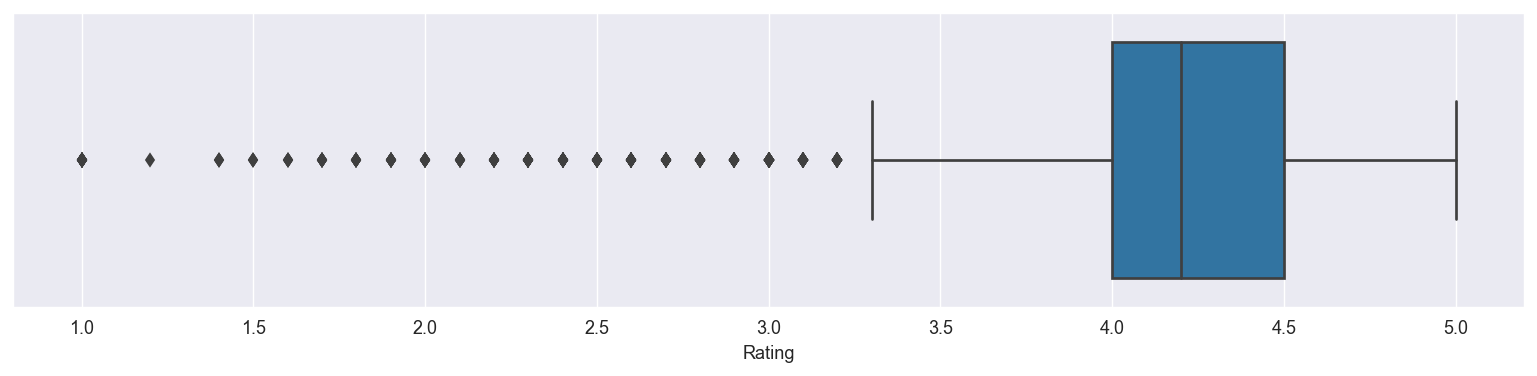

In [46]:
plt.figure(figsize=(15,3), dpi=130)
# sns.set_style('darkgrid')
sns.boxplot(data=df, x='Rating')
plt.show();

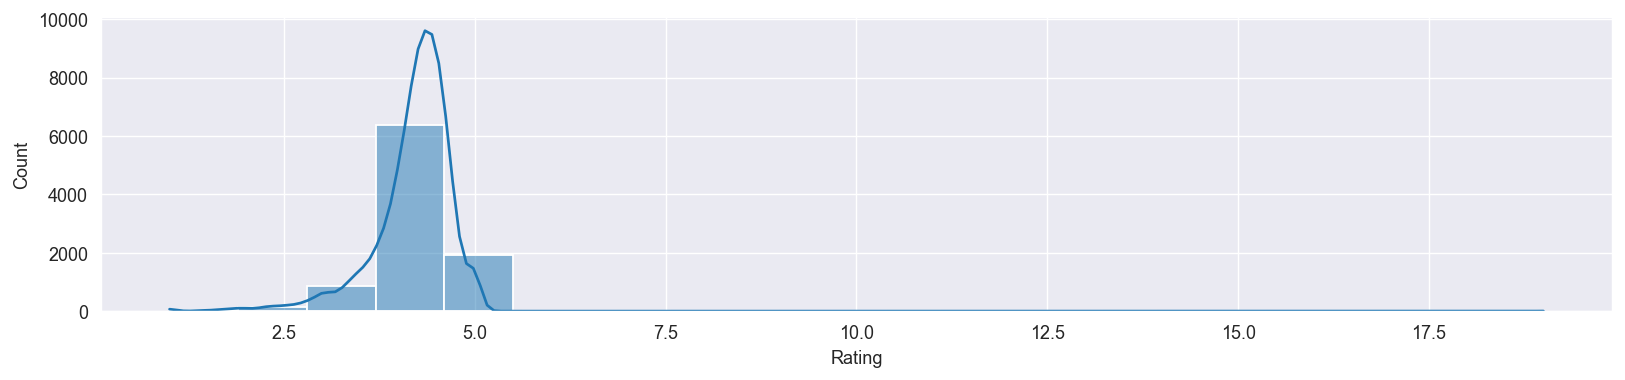

In [19]:
plt.figure(figsize=(15,3), dpi=130)
sns.histplot(df['Rating'], kde=True, bins=20)
plt.show();

In [20]:
# To fill the NAN values in 'Rating' column - 

# 1. We can either remove the outlier first and then take the mean of the column and set it to replace the NAN values
# 2. We can take the Median and set it to replace the NAN values and deal with the outlier later

# I am taking the first approach here.

In [21]:
df.loc[df['Rating'] == 19]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,NaN,NaN,NaN,0,NaN,NaN,"February 11, 2018",NaT,4.0 and up,NaN


In [22]:
df = df.drop(index=df.loc[df['Rating'] == 19].index)

In [23]:
df.iloc[10470:10475] # The Outlier has been dropped

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49.0,4194304.0,10000.0,Free,0.0,Everyone,Communication,2017-02-10,0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042.0,NaN,100000.0,Free,0.0,Everyone,Personalization,2014-08-05,3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203.0,4299161.6,10000000.0,Free,0.0,Everyone,Tools,2018-08-07,6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37.0,14680064.0,1000.0,Free,0.0,Everyone,Communication,2014-11-21,2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132.0,2726297.6,50000.0,Free,0.0,Everyone,Tools,2017-05-17,0.0.9,2.3 and up


In [24]:
# Filling the NAN values in the Rating column with the Mean of the column

In [25]:
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

In [26]:
df.isnull().sum() # All the NAN values in the 'Rating' column have been filled with the median value - 4.3. Also, the above record 
# with Rating = 19 had NAN values for alot of columns which have been fixed now that it's deleted. 

App                  0
Category             0
Rating               0
Reviews              0
Size              2011
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

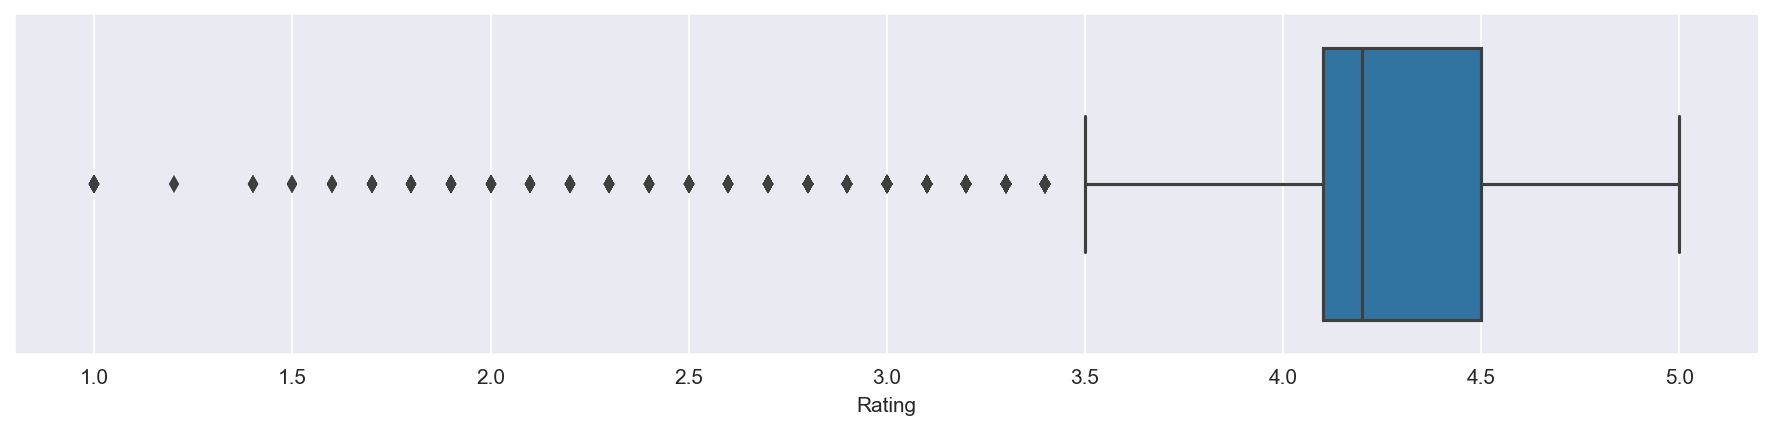

In [27]:
plt.figure(figsize=(15,3), dpi=150)
sns.set_style('darkgrid')
sns.boxplot(data=df, x='Rating')
plt.show();

In [28]:
df['Rating'].describe() # The above box plots matches the data below. 

# The Median of the data is 4.3, The first Quartile is 4.1 while the third Quartile is 4.5 which means the IQR is 0.4. The Whiskers are 1.5 * IQR 
# which is 3.5 and 5.1 and anything beyond these points are the outliers.

count    10840.000000
mean         4.191757
std          0.478907
min          1.000000
25%          4.100000
50%          4.200000
75%          4.500000
max          5.000000
Name: Rating, dtype: float64

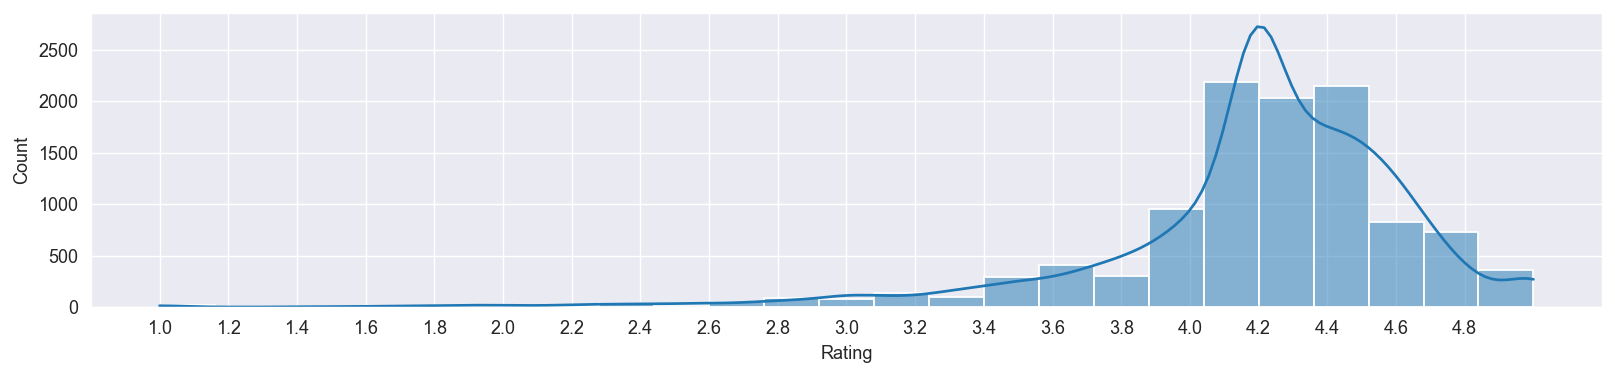

In [29]:
plt.figure(figsize=(15,3), dpi=130)
sns.histplot(df['Rating'], kde=True, bins=25)
plt.xticks(np.arange(1,5,0.2))
plt.show();

In [30]:
# Removing Null from the 'Type', 'Current Ver' and the 'Android Ver' column

In [31]:
df.loc[df['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.191757,0.0,NaN,0.0,NaN,0.0,Everyone 10+,Strategy,2018-06-28,Varies with device,Varies with device


In [32]:
df['Type'] = df.apply(lambda x: 'Free' if x['Price'] == 0 else 'Paid', axis=1) #Specifying the Type based on the value of the Price column

In [33]:
df['Type'].isnull().sum()

0

In [34]:
# 'Current Ver' and 'Android Ver' both are categorical columns with object type data so we can use the mode of the 2 columns to fill their NAN values

In [35]:
print(df['Current Ver'].mode())
print(df['Android Ver'].mode())

0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [36]:
print(df['Current Ver'].isnull().sum())
print(df['Android Ver'].isnull().sum())

8
2


In [37]:
df['Current Ver'] = df['Current Ver'].fillna(df['Current Ver'].mode().iloc[0])
df['Android Ver'] = df['Android Ver'].fillna(df['Android Ver'].mode().iloc[0])

In [38]:
df.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              2011
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

#### Deleting duplicate data (if any)

In [39]:
df.loc[df.duplicated(subset=['App'], keep='first')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805.0,NaN,5000000.0,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872.0,NaN,10000000.0,Free,0.0,Everyone,Business,2018-07-31,Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991.0,NaN,5000000.0,Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614.0,38797312.0,10000000.0,Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989.0,NaN,1000000.0,Free,0.0,Everyone,Business,2018-07-16,4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145.0,1468006.4,100000.0,Free,0.0,Mature 17+,Dating,2016-02-25,2.2,4.0 and up
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981.0,4194304.0,1000000.0,Free,0.0,Everyone,Communication,2018-07-06,5.2,5.0 and up
10730,FP Notebook,MEDICAL,4.5,410.0,62914560.0,50000.0,Free,0.0,Everyone,Medical,2018-03-24,2.1.0.372,4.4 and up
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599.0,12582912.0,1000000.0,Free,0.0,Everyone,Shopping,2018-07-30,3.9,4.4 and up


In [40]:
df = df.drop_duplicates(keep='first', subset='App')

### Data Analysis and Visualization

In [41]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19922944.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14680064.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,9122611.2,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,26214400.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2936012.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


#### Most Popular App based on the number of Reviews

In [42]:
top10_reviews = df.sort_values('Reviews', ascending=False).head(10)
top10_reviews

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306.0,NaN,1.000000e+09,Free,0.0,Teen,Social,2018-08-03,Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,NaN,1.000000e+09,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313.0,NaN,1.000000e+09,Free,0.0,Teen,Social,2018-07-31,Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847.0,NaN,1.000000e+09,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device
1670,Clash of Clans,GAME,4.6,44891723.0,102760448.0,1.000000e+08,Free,0.0,Everyone 10+,Strategy,2018-07-15,10.322.16,4.1 and up
4005,Clean Master- Space Cleaner & Antivirus,TOOLS,4.7,42916526.0,NaN,5.000000e+08,Free,0.0,Everyone,Tools,2018-08-03,Varies with device,Varies with device
1654,Subway Surfers,GAME,4.5,27722264.0,79691776.0,1.000000e+09,Free,0.0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1 and up
3665,YouTube,VIDEO_PLAYERS,4.3,25655305.0,NaN,1.000000e+09,Free,0.0,Teen,Video Players & Editors,2018-08-02,Varies with device,Varies with device
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999.0,NaN,5.000000e+08,Free,0.0,Everyone,Tools,2018-08-04,4.6.6,Varies with device
1660,Clash Royale,GAME,4.6,23133508.0,101711872.0,1.000000e+08,Free,0.0,Everyone 10+,Strategy,2018-06-27,2.3.2,4.1 and up


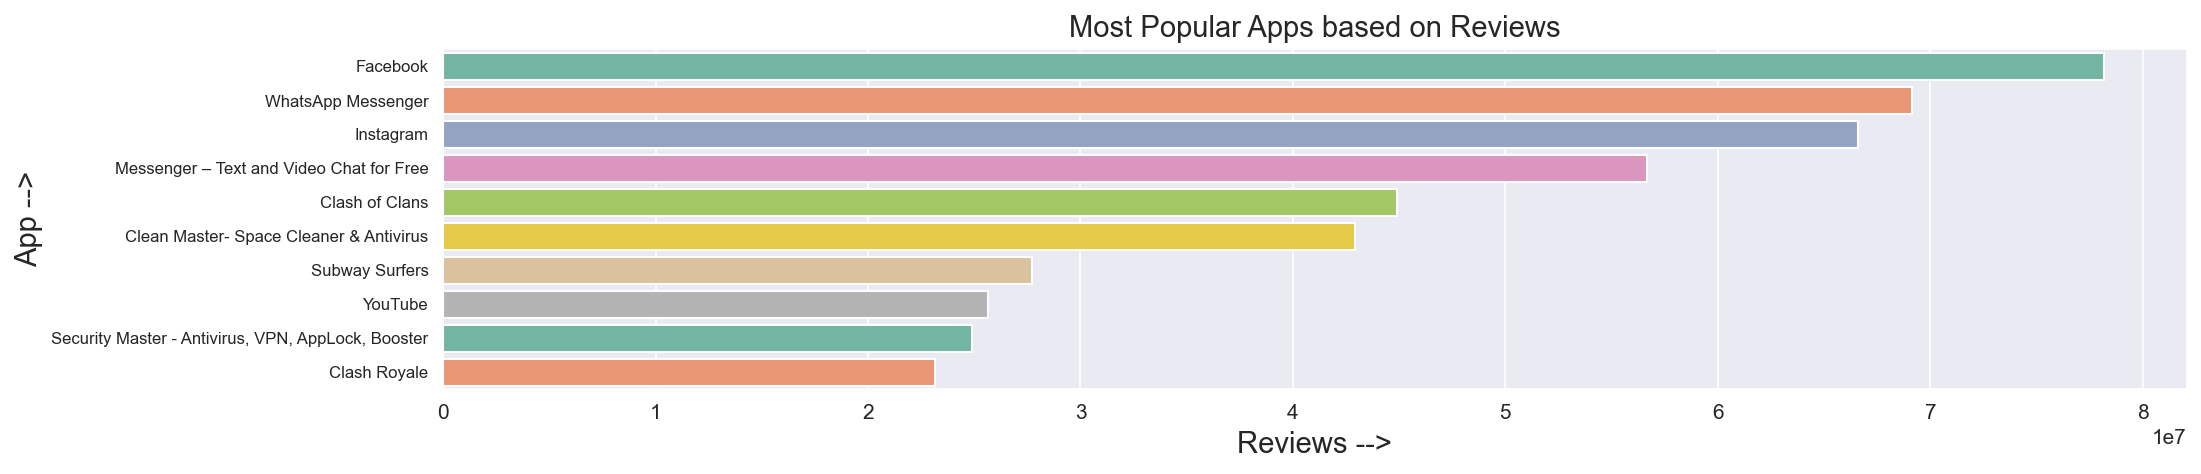

In [43]:
plt.figure(figsize=(15,3), dpi=150)
sns.barplot(data=top10_reviews, x='Reviews', y='App', palette='Set2')
plt.xlabel('Reviews -->', fontsize=14)
plt.ylabel('App -->', fontsize=14)
plt.yticks(fontsize=8)
plt.title('Most Popular Apps based on Reviews', fontsize=14)
plt.show();


#### Number of Apps per category

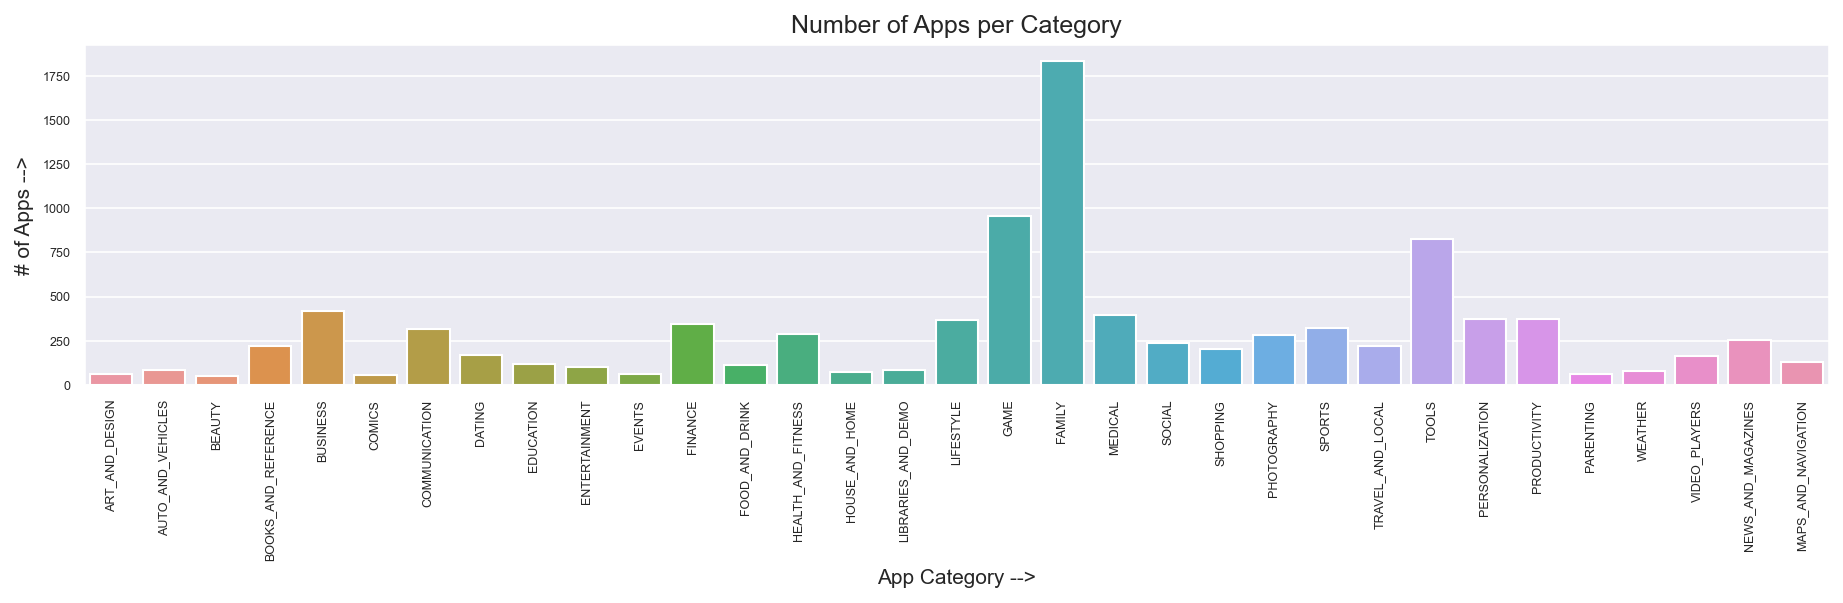

In [44]:
plt.figure(figsize=(15,3), dpi=150)
sns.countplot(data=df, x='Category')
plt.xticks(rotation=90, fontsize=6)
plt.yticks(fontsize=6)
plt.xlabel('App Category -->', fontsize=10)
plt.ylabel('# of Apps -->', fontsize=10)
plt.title('Number of Apps per Category')
plt.show()

#### Top 5 highest rated apps with more than a million reviews

In [51]:
df.loc[df['Reviews'] > 1000000].sort_values('Rating', ascending=False).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2571,Amino: Communities and Chats,SOCIAL,4.8,1259075.0,65011712.0,10000000.0,Free,0.0,Teen,Social,2018-07-20,1.8.19179,4.0.3 and up
6707,Vlogger Go Viral - Tuber Game,FAMILY,4.8,1304467.0,71303168.0,10000000.0,Free,0.0,Everyone,Strategy,2018-07-27,2.9,4.1 and up
4073,Eternium,FAMILY,4.8,1506783.0,93323264.0,10000000.0,Free,0.0,Teen,Role Playing,2018-07-18,1.2.115,4.0 and up
1360,Period Tracker - Period Calendar Ovulation Tra...,HEALTH_AND_FITNESS,4.8,4559407.0,NaN,100000000.0,Free,0.0,Everyone,Health & Fitness,2018-08-01,Varies with device,Varies with device
4799,PewDiePie's Tuber Simulator,FAMILY,4.8,1499466.0,100663296.0,10000000.0,Free,0.0,Teen,Casual,2018-07-24,1.25.0,4.1 and up


#### Type of App distributed by Content Rating

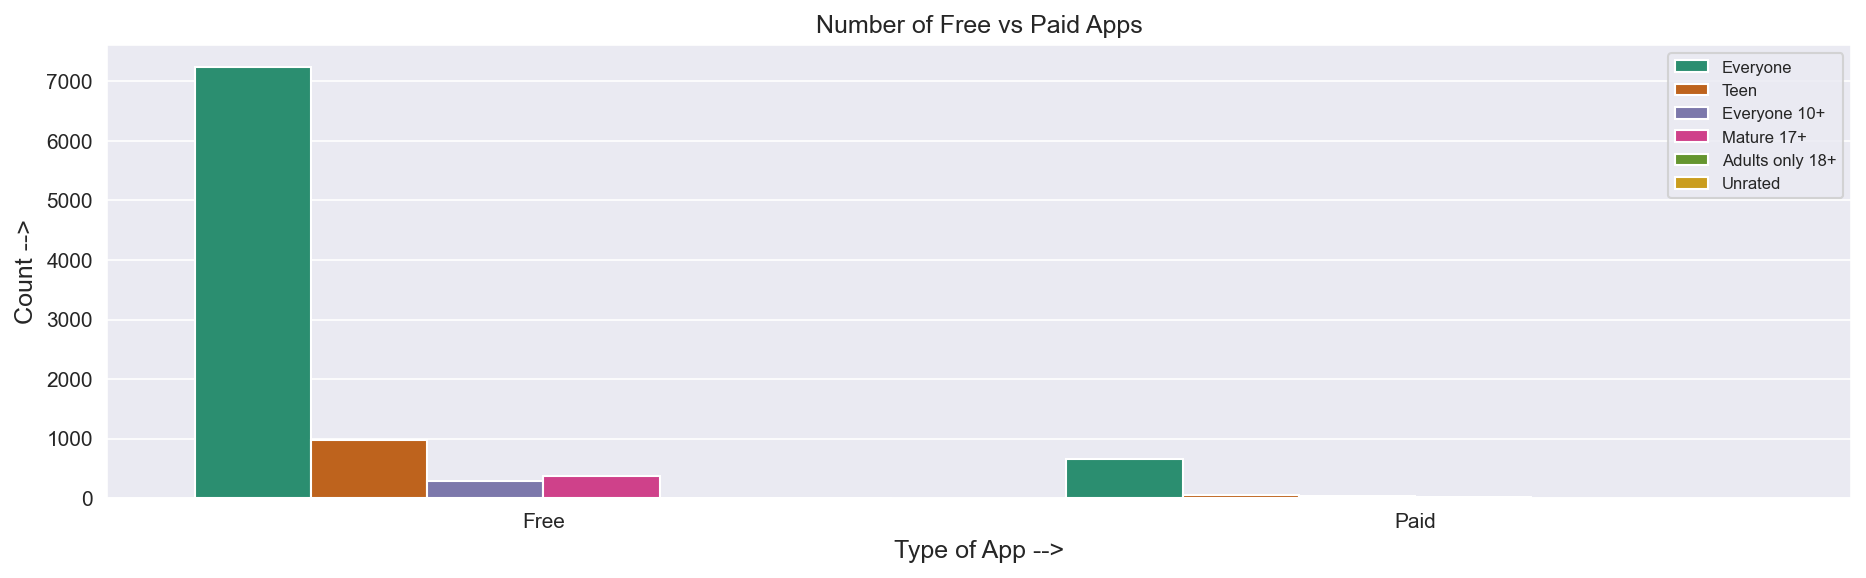

In [54]:
#Plotting the amount of free vs paid apps on the playstore  by the Content Rating
plt.figure(figsize=(15, 4), dpi=150)
sns.countplot(data=df, x='Type', hue='Content Rating', palette='Dark2')
plt.xlabel('Type of App -->', fontsize=12)
plt.ylabel('Count -->', fontsize=12)
plt.title('Number of Free vs Paid Apps', fontsize=12)
plt.legend(loc='upper right', fontsize=8)
plt.show();

#### Top 10 most popular genres

In [58]:
top10_genres = df['Genres'].value_counts().head(10)
top10_genres

Tools              826
Entertainment      561
Education          510
Business           420
Medical            395
Personalization    376
Productivity       374
Lifestyle          368
Finance            345
Sports             331
Name: Genres, dtype: int64

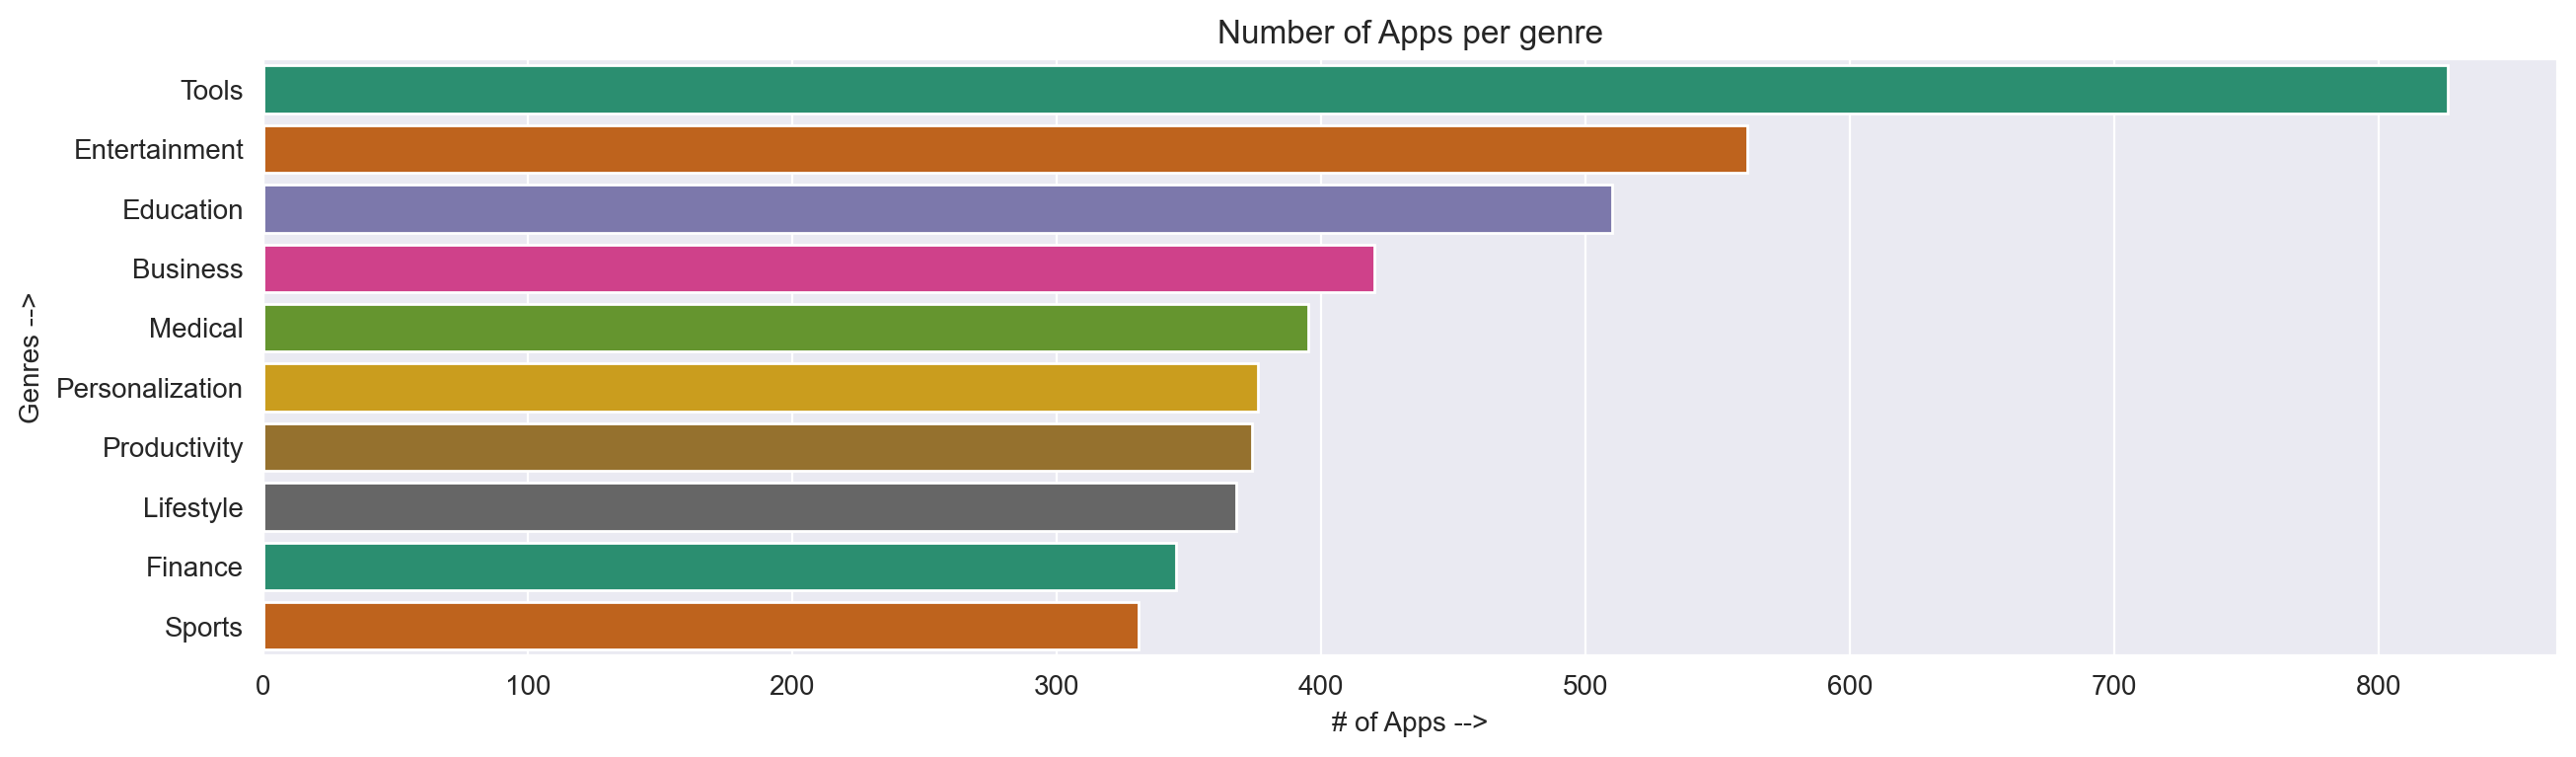

In [64]:
plt.figure(figsize=(15,4), dpi=200)
sns.barplot(x=top10_genres.values, y=top10_genres.index, palette='Dark2')
plt.xlabel('# of Apps -->')
plt.ylabel('Genres -->')
plt.title('Number of Apps per genre')
plt.show();

#### Apps not updated for the longest time

In [67]:
df.sort_values('Last Updated').head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7479,FML F*ck my life + widget,FAMILY,4.2,1415.0,NaN,100000.0,Free,0.00,Everyone,Entertainment,2010-05-21,3.1,1.5 and up
7430,CJ Poker Odds Calculator,GAME,4.1,207.0,NaN,50000.0,Free,0.00,Everyone,Card,2011-01-30,1.2,1.6 and up
10282,FD Shift Calendar Widget,TOOLS,4.1,981.0,NaN,100000.0,Free,0.00,Everyone,Tools,2011-03-16,1.2.4,1.6 and up
8418,DEER HUNTER CHALLENGE,GAME,3.7,38767.0,4299161.6,5000000.0,Free,0.00,Everyone 10+,Action,2011-04-11,1.4.3,2.0 and up
8084,Freecell CY,GAME,4.0,387.0,1153433.6,50000.0,Free,0.00,Everyone,Card,2011-04-16,1.3.3,1.6 and up
9067,Dx Ludo,FAMILY,3.6,215.0,2726297.6,50000.0,Free,0.00,Everyone,Puzzle,2011-04-18,1.0,2.1 and up
5144,AH Alarm Panel,TOOLS,3.9,7.0,NaN,100.0,Paid,4.99,Everyone,Tools,2011-05-12,1.2.0,1.5 and up
7237,CF-Bench Pro,TOOLS,4.6,159.0,NaN,1000.0,Paid,1.49,Everyone,Tools,2011-06-23,1.1,1.6 and up
10460,Wi-Fi Rabbit Unlock Key,TOOLS,4.5,142.0,NaN,5000.0,Paid,1.00,Everyone,Tools,2011-06-26,1.0.0,2.1 and up
1544,Apk Installer,LIBRARIES_AND_DEMO,3.8,7750.0,NaN,1000000.0,Free,0.00,Everyone,Libraries & Demo,2011-06-29,1.0,1.6 and up


#### Top 5 costliest apps not containing the word 'Rich'

In [75]:
df.loc[(~(df['App'].str.lower().str.contains('rich'))) & (df['Type'] == 'Paid')].sort_values('Price', ascending=False).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.300000,6.0,1572864.0,100.0,Paid,399.99,Everyone,Entertainment,2018-07-16,1.0,7.0 and up
9917,Eu Sou Rico,FINANCE,4.191757,0.0,1468006.4,0.0,Paid,394.99,Everyone,Finance,2018-07-11,1.0,4.0.3 and up
9719,EP Cook Book,MEDICAL,4.191757,0.0,3355443.2,0.0,Paid,200.00,Everyone,Medical,2015-07-26,1.0,3.0 and up
6692,cronometra-br,PRODUCTIVITY,4.191757,0.0,5662310.4,0.0,Paid,154.99,Everyone,Productivity,2017-11-24,1.0.0,4.1 and up
6624,BP Fitness Lead Scanner,EVENTS,4.191757,0.0,7025459.2,1.0,Paid,109.99,Everyone,Events,2017-08-23,0.0.1,4.1 and up
